In [13]:
#
#
# time series plots
#
#

In [14]:
# Packages

# data handling
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as mpl
%matplotlib inline

import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors


# paths and loading
import os
from scipy.io import loadmat

In [15]:
# choose variables
data_path = '/Users/cbla0002/Documents/data'

# all
percentiles= ['95th_percentile', '97th_percentile', '99th_percentile']
var_files= ['domain', 'convective_objects', 'aggregation_index', 'examples']
insts = ['IPSL','NOAA-GFDL','NASA-GISS','BCC','CNRM-CERFACS','NCAR'
        ,'NIMR-KMA','BNU','ICHEC','LASG-CESS','MPI-M','CMCC','INM','NCC' 
        ,'CCCma','MIROC','MOHC','MRI','NSF-DOE-NCAR']
vars= ['pr','hus','tas','convective_objects','aggregation_index']
scenarios= ['historical', 'rcp85']


# chosen
percentile= ['97th_percentile']
var_file= ['domain', 'aggregation_index']
inst = ['IPSL']
var= ['pr', 'aggregation_index']
scenario= ['historical']


In [16]:
# check variables (domain_pr)
fileName = inst[0] + '_' + var_file[0] + '_' + var[0] + '_' + scenario[0] 
#print(fileName)

file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[0], fileName))
#print(file_path)

data = loadmat(file_path)
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'M_area', 'M_lat', 'M_lon', 'Rx1day_pr', 'Rx1day_pr_annual', 'Rx1day_pr_image', 'Rx5day_pr', 'Rx5day_pr_annual', 'Rx5day_pr_image', 'Wlat', 'Wlon', 'area_prctile', 'day_of_snapshot', 'gridbox_5day_pr', 'gridbox_pr', 'lat', 'lat_old', 'lon', 'lon_old', 'mean_pr_image', 'mean_pr_prctile_rate', 'mean_pr_prctile_vol', 'mean_pr_vol', 'prctile_rate_99', 'prctile_rate_99_9', 'prctile_rate_99_99', 'snapshot_pr_image', 'time_range', 'trop_end', 'trop_start'])


In [17]:
# check variables (aggregation_index)
fileName = inst[0] + '_' + var[1] + '_' + scenario[0] 
#print(fileName)

file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[1], fileName))
#print(file_path)

data2 = loadmat(file_path)
print(data2.keys())

dict_keys(['__header__', '__version__', '__globals__', 'COP', 'COP_n', 'Number_index', 'Number_index_n', 'ROME', 'ROME_n', 'SCAI', 'SCAI_n'])


In [18]:
# a= data['ROME']

# print(type(a))
# print(np.shape(a))
# print(np.squeeze(a))

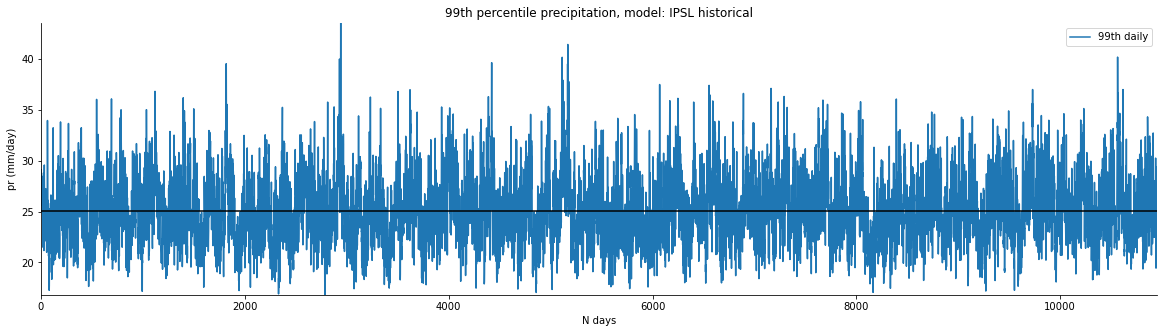

In [19]:
# plot
y= np.squeeze(data['prctile_rate_99'])
x= np.arange(0,len(y),1)

fig = plt.figure(figsize=(20,5))
plt.plot(x,y, label='99th daily') #, marker='o', markersize=7.5, mfc= 'white', linestyle='--')
plt.axhline(y=np.mean(y), color='k')

xmin= 0
xmax= x[-1]
ymin= np.min(y)
ymax= np.max(y)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title('99th percentile precipitation, ' + 'model: ' + inst[0] + ' historical')
plt.xlabel('N days')
plt.ylabel('pr (mm/day)')
plt.legend(loc='upper right')

sns.despine(top=True, right=True, left=False, bottom=False)


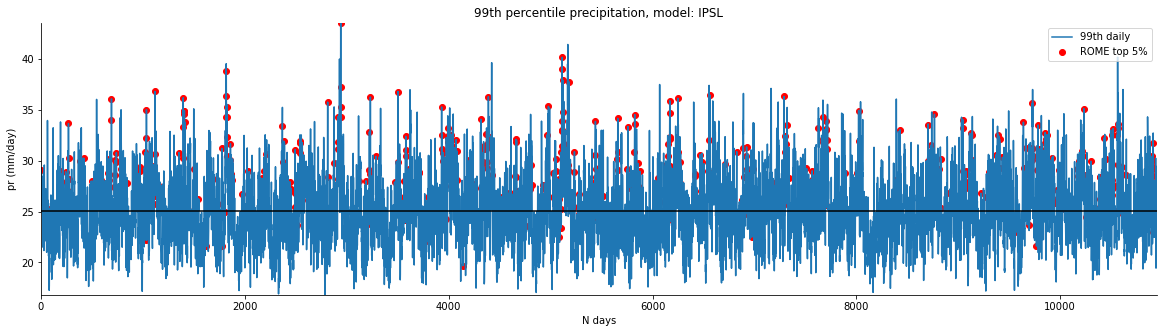

In [20]:
# plot
y= np.squeeze(data['prctile_rate_99'])
x= np.arange(0,len(y),1)

rome = np.squeeze(data2['ROME'])
rome_prctile = np.percentile(rome,95)
x2= np.argwhere(rome>=rome_prctile)

fig = plt.figure(figsize=(20,5))
plt.plot(x,y, label='99th daily') #, marker='o', markersize=7.5, mfc= 'white', linestyle='--')
plt.scatter(x2,y[x2],label='ROME top 5%', color='r')
plt.axhline(y=np.mean(y), color='k')

xmin= 0
xmax= x[-1]
ymin= np.min(y)
ymax= np.max(y)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title('99th percentile precipitation, model: ' + inst[0])
plt.xlabel('N days')
plt.ylabel('pr (mm/day)')
plt.legend(loc='upper right')

sns.despine(top=True, right=True, left=False, bottom=False)

plt.savefig('/Users/cbla0002/Desktop/Timeseries.pdf')